In [8]:
from NeuralNetwork import *
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore", category=numpy.VisibleDeprecationWarning)

In [2]:
# Создаем экземпляр нейронной сети
layers = 3
nodes = (784, 800, 10)
learning_rate = 0.3

n = NeuralNetwork(layers, nodes, learning_rate)
# n.import_tables()

In [4]:
# Загружаем тренировочные данные
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# for record in training_data_list:
#     values = record.split(",")
#     inputs = (numpy.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
#     targets = numpy.zeros(nodes[-1]) + 0.01
#     targets[int(values[0])] = 0.99
#     n.train(inputs, targets)

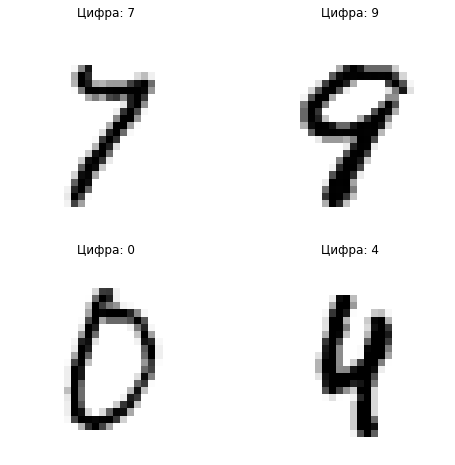

In [44]:
from PIL import Image
from random import sample

rows = 2  # Количество строк в таблице
columns = 2  # Количество столбцов в таблице

numbers = sample(range(len(training_data_list)), rows * columns)

fig = plt.figure(figsize=(8, 8))

for i in range(len(numbers)):
    fig.add_subplot(rows, columns, i + 1)
    values = training_data_list[numbers[i]].split(",")
    inputs = (numpy.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
    inputs = inputs.reshape((28, 28))
    plt.title(f"Цифра: {int(values[0])}")
    plt.axis('off')
    plt.imshow(inputs, interpolation='nearest', cmap="gray_r")

plt.show()

In [7]:
score = 0
count = 0
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

for i in test_data_list:
    count += 1
    values = i.split(",")
    correct_number = int(values[0])

    outputs = n.query((numpy.asfarray(values[1:]) / 255.0 * 0.99) + 0.01)
    network_answer = numpy.argmax(outputs)
    
    if (correct_number == network_answer):
        score += 1
    
print("Эффективность сети:", score / count)

Эффективность сети: 0.9596


In [5]:
# n.export_tables()